## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Loading the dataset, visualization and preprocessing

In [ ]:
df = pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

From the above cell we can say that there are no missing values in any rows in the dataset, so we can proceed towards visualization

Finding out the number of examples that each crop type has in the dataset

<Axes: >

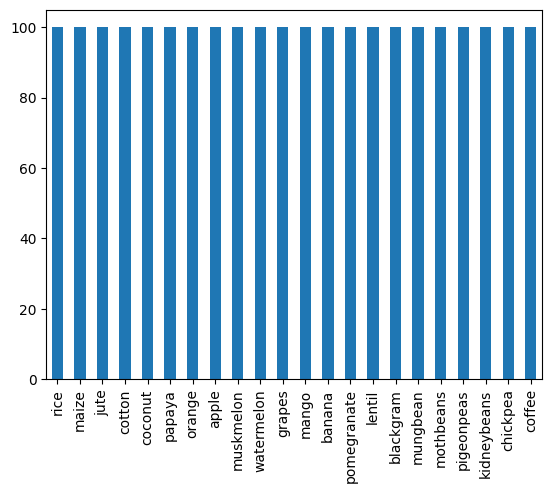

In [ ]:
df["label"].value_counts().plot(kind = "bar")

creating a new dataframe that will contain the average parameter values for each crop type

In [ ]:
stats_by_crop_type = df.groupby(by = "label").mean().reset_index()

In [ ]:
stats_by_crop_type

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


creating a map that contains the encoding for each crop type, encoding is done so that the model performs better

In [ ]:
crop_names = df["label"].unique().tolist()
crop_index = [x for x in range(len(crop_names))]

In [ ]:
crop_reference = dict(zip(crop_names, crop_index))

In [ ]:
print(crop_reference)

{'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


replacing the crop names by their encoding in the given dataset column "label"

In [ ]:
df["label"] = df["label"].map(crop_reference)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0


plotting each feature against the other feature using seaborn to visualize data

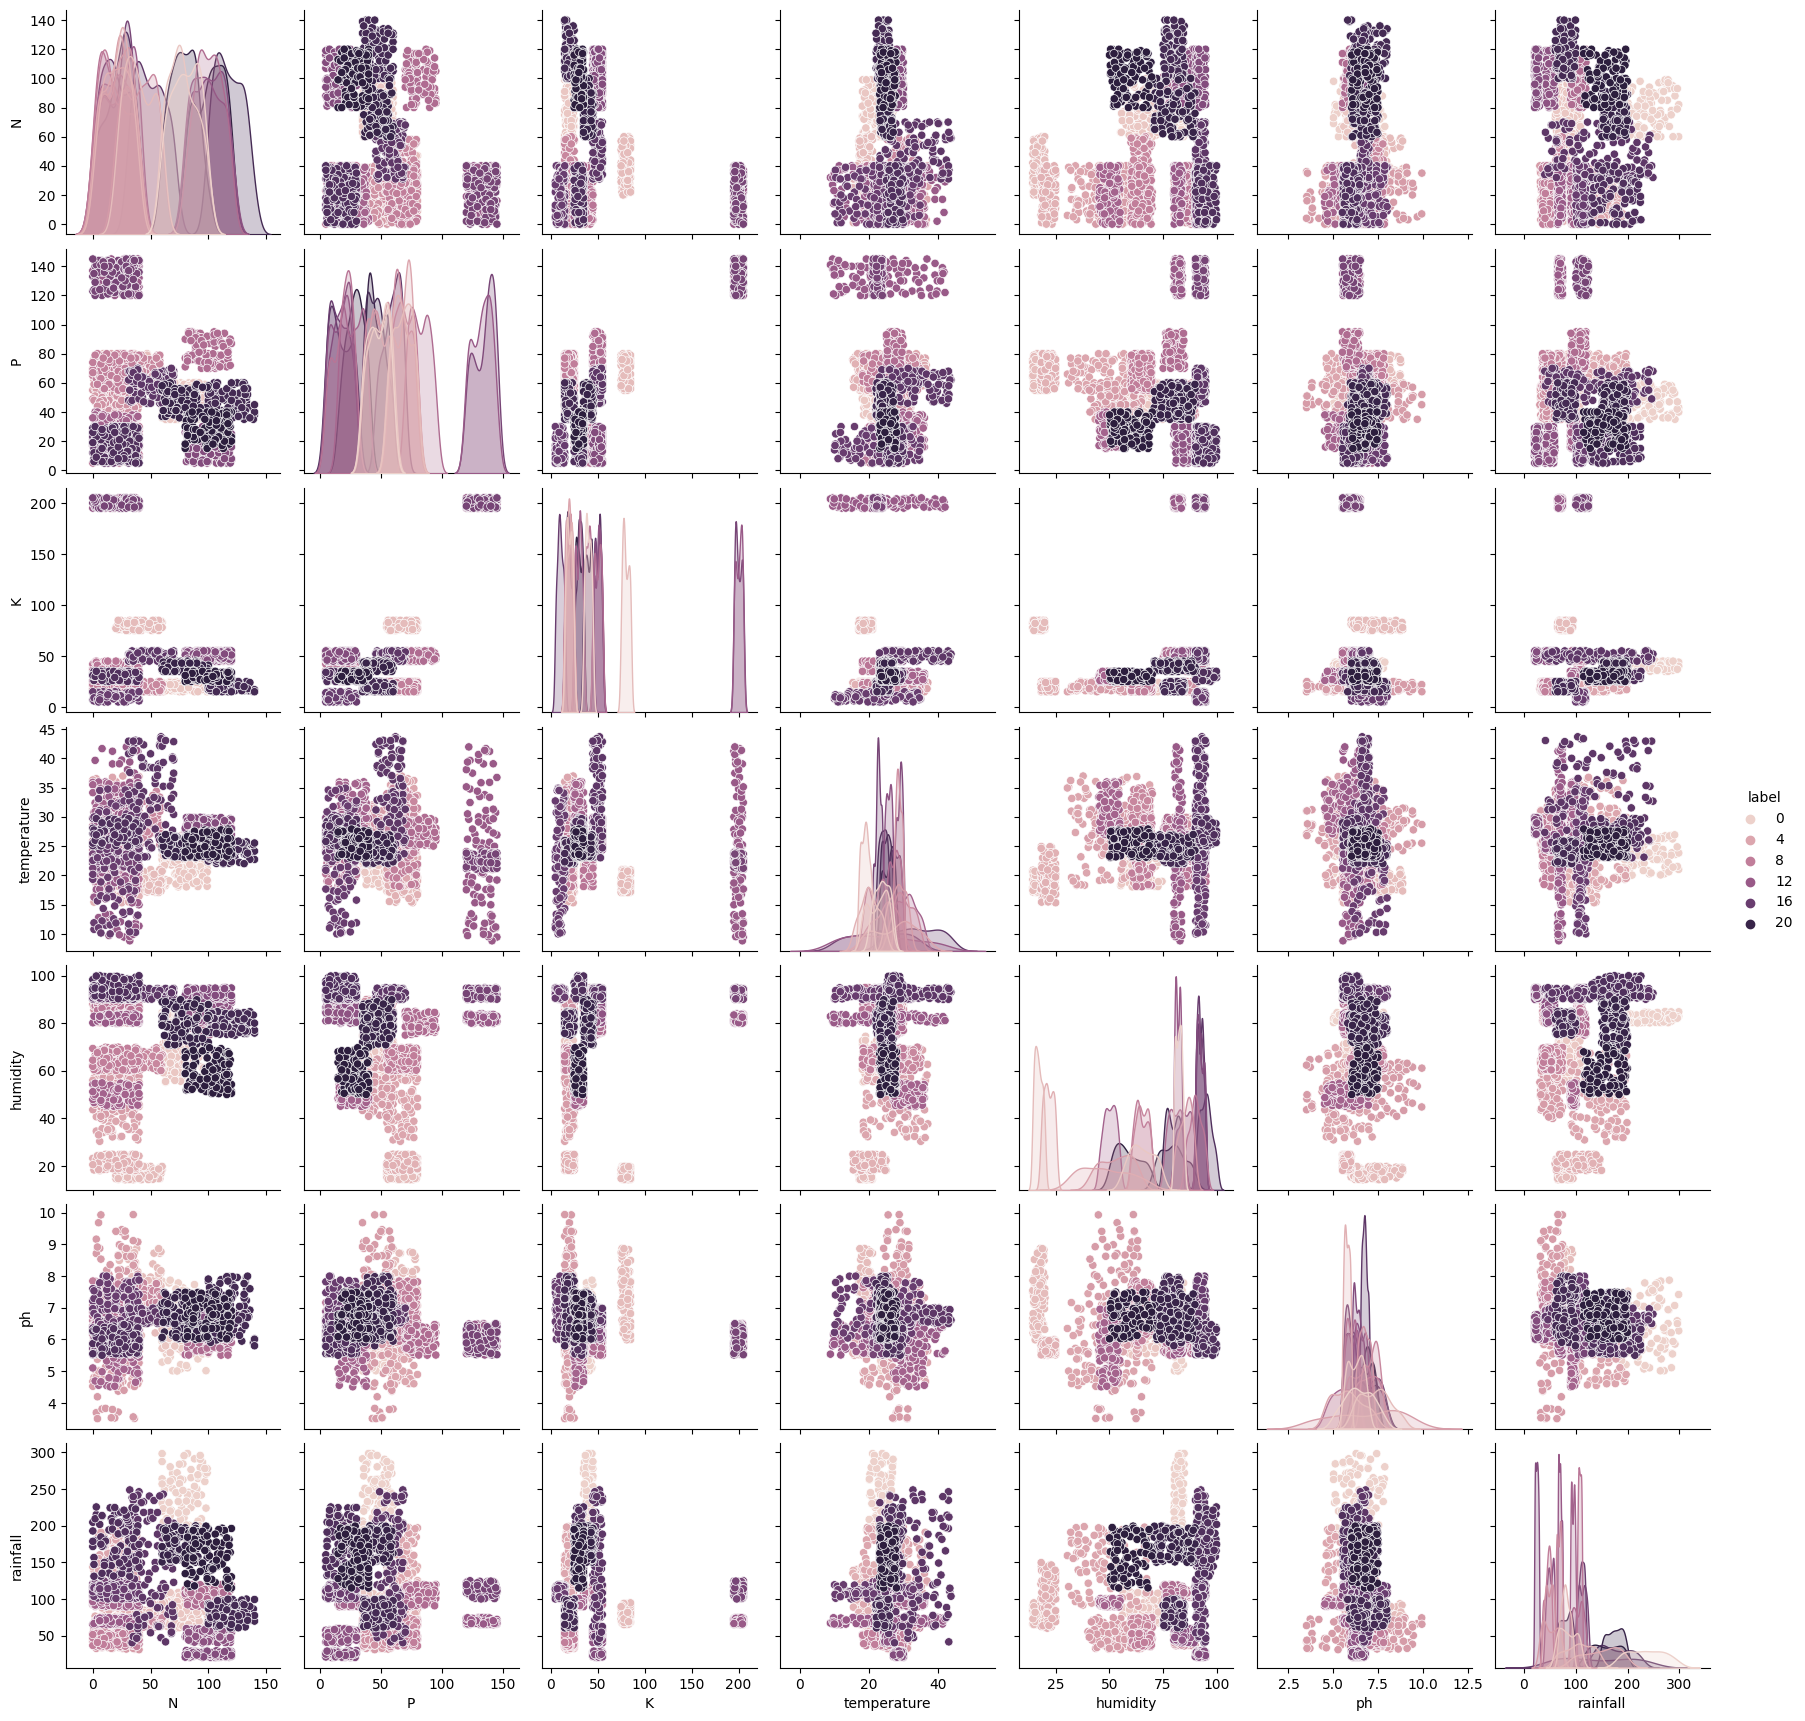

In [ ]:
sns.pairplot(data = df,hue = "label")
plt.show()

displaying the correlation matrix for the given dataset

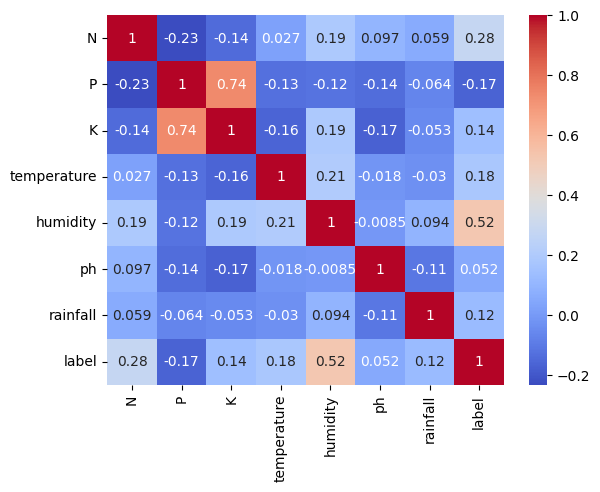

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

printing the top 5 crops that require the most quantity of each feature

In [ ]:
for feature in ["N", "P", "K", "temperature", "ph", "humidity", "rainfall"]:
    print("Top 5 most", feature, "requiring crops;")
    for crop_name, val in stats_by_crop_type.sort_values(by = feature, ascending = False)[:5][['label', feature]].values:
        print(f"{crop_name} --> {val}")
    print("\n")

Top 5 most N requiring crops;
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42


Top 5 most P requiring crops;
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79


Top 5 most K requiring crops;
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08


Top 5 most temperature requiring crops;
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353


Top 5 most ph requiring crops;
chickpea --> 7.33695662374
blackgram --> 7.13395162948
orange --> 7.01695745276
lentil --> 6.927931571609999
cotton --> 6.91267549578


Top 5 most humidity requiring crops;
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34280196089999
apple --> 92.3333828756
orange --> 92.17020876340001


Top 5 most rainfall requiring crops;
rice --> 236.181113594
coconut --> 175.686645804
jute --> 174.79279753

printing the top 5 crops that require the least quantity of each feature

In [ ]:
for feature in ["N", "P", "K", "temperature", "ph", "humidity", "rainfall"]:
    print("Top 5 least", feature, "requiring crops;")
    for crop_name, val in stats_by_crop_type.sort_values(by = feature, ascending = True)[:5][['label', feature]].values:
        print(f"{crop_name} --> {val}")
    print("\n")

Top 5 least N requiring crops;
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73


Top 5 least P requiring crops;
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75


Top 5 least K requiring crops;
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79


Top 5 least temperature requiring crops;
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132


Top 5 least ph requiring crops;
kidneybeans --> 5.749410585870001
mango --> 5.766372799660001
pigeonpeas --> 5.794174879790001
apple --> 5.929662931809999
coconut --> 5.97656212619


Top 5 least humidity requiring crops;
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pigeonpeas --> 48.0616330847
mango --> 50.1565726953
mothbeans --> 53.16041802790001


Top 5 least rainfall requiring crops;
muskmelon --> 24.689952066
lentil --> 

In [ ]:
X = df.drop('label', axis = 1)
Y = df['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size = 0.3, random_state = 100)

# Naive Bayes

In [ ]:
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_train_pred = nb_model.predict(X_train)
print('The accuracy on training set is ', accuracy_score(Y_train_pred, Y_train))

The accuracy on training set is  0.9948051948051948


In [ ]:
Y_test_pred = nb_model.predict(X_test)
print('The accuracy on test set is ', accuracy_score(Y_test_pred, Y_test))

The accuracy on test set is  0.9954545454545455


# Random Forest

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_train_pred2 = rf_model.predict(X_train)
print('The accuracy on training set is ', accuracy_score(Y_train_pred2, Y_train))

The accuracy on training set is  1.0


In [ ]:
Y_test_pred2 = rf_model.predict(X_test)
print('The accuracy on test set is ', accuracy_score(Y_test_pred2, Y_test))

The accuracy on test set is  0.9939393939393939


# XGBoost

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
Y_train_pred3 = xgb_model.predict(X_train)
print('The accuracy on training set is ', accuracy_score(Y_train_pred3, Y_train))

The accuracy on training set is  1.0


In [ ]:
Y_test_pred3 = xgb_model.predict(X_test)
print('The accuracy on test set is ', accuracy_score(Y_test_pred3, Y_test))

The accuracy on test set is  0.9939393939393939


#SVM Classifier

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [ ]:
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
Y_train_pred4 = svm_classifier.predict(X_train)
print('The accuracy on training set is ', accuracy_score(Y_train_pred4, Y_train))

The accuracy on training set is  0.9935064935064936


In [ ]:
Y_test_pred4 = svm_classifier.predict(X_test)
print('The accuracy on test set is ', accuracy_score(Y_test_pred4, Y_test))

The accuracy on test set is  0.9833333333333333


#Logistic Regression

In [ ]:
logreg_model = LogisticRegression()

In [ ]:
logreg_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_train_pred5 = logreg_model.predict(X_train)
print('The accuracy on training set is ', accuracy_score(Y_train_pred5, Y_train))

The accuracy on training set is  0.9681818181818181


In [ ]:
Y_test_pred5 = logreg_model.predict(X_test)
print('The accuracy on test set is ', accuracy_score(Y_test_pred5, Y_test))

The accuracy on test set is  0.9651515151515152


#Decision Tree

In [ ]:
decision_tree_model = DecisionTreeClassifier()

In [ ]:
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_train_pred6 = decision_tree_model.predict(X_train)
print('The accuracy on training set is ', accuracy_score(Y_train_pred6, Y_train))

The accuracy on training set is  1.0


In [ ]:
Y_test_pred6 = decision_tree_model.predict(X_test)
print('The accuracy on test set is ', accuracy_score(Y_test_pred6, Y_test))

The accuracy on test set is  0.9893939393939394
